# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

En la primera celda que tenemos abajo voy a llamar a pandas como pd y despues en la siguiente columna leere los  conjuntos de datos que se brindan en el orden que se me estan brindando, y despues mostrare la información de cada uno de ellos empezando por `/datasets/instacart_orders.csv` y asi sucesivamente hasta mostrar cada uno de ellos. Cabe destacar que en la segunda celda donde estoy leyendo los conjuntos de datos usare `sep = ';'` ya que es el simbolo que separa las columnas del conjunto de datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';') #leyendo el conjunto (/datasets/instacart_orders.csv)
products = pd.read_csv('/datasets/products.csv', sep = ';') #Leyendo el conjunto (/datasets/products.csv)
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';') #Leyendo el conjunto (/datasets/aisles.csv)
departments = pd.read_csv('/datasets/departments.csv', sep = ';') #Leyendo el conjunto (/datasets/departments.csv)
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';') #Leyendo el conjunto (/datasets/order_products.csv)

In [3]:
display(orders.head())
orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(products.head())
products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
display(aisles.head())
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
display(departments.head())
departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
display(order_products.head())
order_products.info(show_counts = True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones
Todos los conjuntos de datos exceptuando los 2 mas pequeños `(aisles , department)` tienen valores nulos. Hay algunos columnas con tipos de datos que sera necesario cambiar para poder trabajar con ellos y poder acceder a los metodos que solo estan disponibles para ese espicifio tipo de datos, como el tipo de datos object puede llegar a ser necesario cambiarlo por un tipo de dato string para poder utilizar los metodos que solo estan accesibles para string como `.upper()`, `lower()` etc.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Todos los conjuntos de datos exceptuando los 2 mas pequeños `(aisles , department)` tienen valores nulos por lo cual va a ser necesario eliminar los valores nulos o cambiarlos por un valor, dependiendo en que sea lo que se nos pida y resulte mejor, podemos tambien ver que todos los nombres de las columnas estan en minusculas y con una buena sintaxis lo cual es bueno. Ahora solo nos faltara revisar si hay valores duplicados y tomar las medidas correspondientes para poder procesar nuestros datos y tenerlos limpios para poder trabajar con ellos. Como lo pueden ser el cambiar el tipo de datos que se encuentren en una columna para poder trabajar con ellos usando `astype()`. Tambien utilizar el metodo `duplicated` junto con `sum` para obtener la cantidad de valores duplicados que tenemos y al identificar los valores duplicados usar el metodo `drop_duplicated()` para eliminarlos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

utilizar el método `duplicated()` en el conjunto de datos `orders` junto con `sum()` para obtener el número de valores duplicados en el conjunto, despues utilizare `orders[orders.duplicated()]` para poder ver esos valores que estan siendo duplicados y despues utilizare el metodo `drop_duplicates()` para eliminar los valores duplicados.

In [8]:
# Revisa si hay pedidos duplicados
pedidos_duplicados = orders['order_id'].duplicated().sum()
print('Numero de valores identicos de pedidos repetidos',pedidos_duplicados)
print()
valores_duplicados = orders[orders['order_id'].duplicated()]
print('filas duplicadas:\n\n')
display(valores_duplicados)

Numero de valores identicos de pedidos repetidos 15

filas duplicadas:




,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Podemos ver que tenemos 15 filas duplicadas, tienen en comun los valores de las columnas `('order_dow', 'order_hour_of_day')` que significa que fueron pedidos realizados los miercoles a las 2am.Y como sabemos esto? Recordemos que la columna `'order_dow'` contiene los valores del día de la semana en que se hizo un pedido (0 si es domingo), por lo tanto el 3 es un miercoles y la columna `'order_hour_of_day'` contiene los valores de la hora del dia en que se hizo el pedido, por lo tanto 2 son las 2am.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_del_miercoles_2am = orders[(orders['order_hour_of_day'] == 2) & (orders['order_dow'] == 3) ]
display(pedidos_del_miercoles_2am)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Este resultado nos sugiere que hay mas filas con valores representando pedidos los dias miercoles a las 2am. Esto es muy bueno, nos ayuda a visualizar que tenemos `121 filas` y esto nos puede ayudar en un futuro a confirmar que hemos eliminado la cantidad correcta de valores duplicados despues de usar el metodo `drop_duplicates()` ya que una forma de verificarlo seria obteniendo el resultado de la diferencia osea el resultado que obtenemos al restar las 121 filas totales originales - las 15 filas duplicadas.Tambien a mi me ayudo a poder confirmar que habian varias filas que cumplian con esas caracteristicas pero que el problema principal es que no es logico que tenga el mismo numero de orden, si tiene sentido que se hagan pedidos en la misma hora y dia pero no que tambien tenga el mismo numero de orden y gracias a eso evite la suposición de que no habia nada de malo con esos 15 datos duplicados. 

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates(subset = 'order_id')
display(orders)
print('Podemos ver que nuestro resultado es correcto, ya que al final tenemos un total de 478952 filas \ncuando en un inicio teniamos 478966 y si restamos estas dos cantidades nos da 14 que es la cantidad de \nvalores duplicados, no muestra 15 por que hay que recordar que cuentan las filas iniciando con el inidice 0')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


Podemos ver que nuestro resultado es correcto, ya que al final tenemos un total de 478952 filas 
cuando en un inicio teniamos 478966 y si restamos estas dos cantidades nos da 14 que es la cantidad de 
valores duplicados, no muestra 15 por que hay que recordar que cuentan las filas iniciando con el inidice 0


In [11]:
# Vuelve a verificar si hay filas duplicadas
verificar_filas_duplicadas = orders.duplicated().sum()
print(verificar_filas_duplicadas)

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
verificar_ids_duplicados = orders['order_id'].duplicated().sum()
print(verificar_ids_duplicados)

0


Al inicio descubri que habia valores duplicados en la columna `order_id` y nos enfocamos en esta columna ya que es de las mas relevantes por que no hay problema que el dia y la hora se repiten por que puede succeder, pero si es un problema que los ids para las ordenes se repitan en la misma hora y dia, por lo tanto los elimine. Al eliminar los valores duplicados en la columna `order_id` dejaron de haber filas duplicadas. Aprendi la importancia de tener un buen razonamiento y conocimiento del tema para identificar la columna donde en caso de que sus datos esten duplicados son un problema, al principio me preguntaba ¿por que estamos revisando la columna `order_id` en lugar de buscar en todo el cojunto de datos o quizas otra columna? Ahora comprendo por que. Pueden existir varias razones como de que si lo hicieramos para todo el conjunto de datos y si el conjunto de datos es muy grande el proceso tomaria mas tiempo y si lo hacemos con otra columna como `order_dow` habrian muchos valores repetidos pero que en realidad no nos brindan informacion importante como lo es con la columna `order_id`.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products_duplicated = products.duplicated().sum()
print('Numero de filas totalmente duplicadas:',products_duplicated)

Numero de filas totalmente duplicadas: 0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos        orders['order_id'].duplicated().sum()
product_id_duplicated = products.duplicated(subset = 'product_id').sum()
print('Numero de IDs duplicados de productos:', product_id_duplicated)


Numero de IDs duplicados de productos: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(f'-Cantidad de nombres de productos duplicados: {products.duplicated(subset = "product_name").sum()}\n\n')
products_names_duplicated = products[products.duplicated(subset = 'product_name')]
print('-Nombres de Productos Duplicados en Mayusculas')
display(products_names_duplicated)




-Cantidad de nombres de productos duplicados: 1361


-Nombres de Productos Duplicados en Mayusculas


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products_not_isna_duplicated = products[~(products['product_name'].isna()) & (products['product_name'].duplicated())]
print()
display(products_not_isna_duplicated)


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Descubri que este conjunto de datos no tiene celdas identicas ni IDs de productos duplicados pero que si tiene nombres de productos repetidos, lo cual no es malo y no los eliminamos por que si los eliminaramos perderiamos informacion.Harbia problema si tuvieramos filas identicas o que tambien tuvieramos id de productos duplicados por que cada producto tiene un id unico y crearia confusiones. En este caso no es asi y como tal no hay problema en que tengamos nombres de productos iguales siempre y cuando tengan un id de producto diferente para poder diferenciarlos y saber que no son duplicados. Por ejemplo, ambos pueden ser burritos pero cada uno tiene un ID de producto diferente para poder llevar un registro de cuantos burritos de ese tipo tenemos. Algo que tambien descubri es la conversion de los nombres de los productos a mayusculas, los valores NaN, no se convirtieron en mayusculas, si se hubieran convertido en mayusculas en la siguiente celda cuando buscaramos duplicados de productos no faltantes tambien los marcaria por que ya no serian `'NaN'` sino `'NAN'` y descubri esto por que cometi un error y tambien me los cambiaba y no me salia este ejercicio por que me agregaba los valores `'NAN'`, si cambiamos los valores faltantes a mayusculas python dejara de percibirlos como valores faltantes.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
department_duplicated_rows = departments[departments.duplicated()]
display(department_duplicated_rows)

,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
department_ids_duplicated = departments[departments.duplicated(subset = 'department_id')]
display(department_ids_duplicated)

,department_id,department


Como habiamos mencionado en un principio los conjuntos de datos `'departments' , 'aisles'` aparecian sin datos faltantes, y ahora con esta revision de de duplicados en el conjunto `'departments'`  podemos saber que el conjunto de datos `'departments'` esta limpio y listo para trabajar con el.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles_filas_duplicadas = aisles[aisles.duplicated()]
display(aisles_filas_duplicadas)

,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles_IDs_duplicados = aisles[aisles.duplicated(subset = 'aisle_id')]
display(aisles_IDs_duplicados)

,aisle_id,aisle


De la misma forma que el conjunto de datos `'departments'` este conjunto llamado `'aisles'` no cuenta con valores duplicados y tambien desde un inicio no aparecia con datos faltantes, por lo cual parece que esta listo para trabajar con el, a no ser que tenga valores faltantes que python no este reconociendo.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products_duplicated_rows = order_products[order_products.duplicated()]
display(order_products_duplicated_rows)

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_IDs_duplicated = order_products[order_products.duplicated(subset = ['order_id','product_id'])]
display(order_products_IDs_duplicated)

,order_id,product_id,add_to_cart_order,reordered


El conjunto de datos `'order_products'` se parece mucho a los 2 anteriores que realizamos, no parece tener filas datos duplicados ni datos duplicados en las columnas `'order_id' , 'product_id'` escogi estas dos columnas ya que son las que veo mas relevantes para hacer una revision de sus datos duplicados ya que si las demas columnas estan duplicadas no afectarian tanto el analisis como si las columnas `'order_id' , 'product_id'` estuvieran duplicadas. En un inicio pude ver que este conjunto de datos tenia datos faltantes por lo cual todavia le hace falta un poco mas de preprocesamiento.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
product_name_isna = products[products['product_name'].isna()]
display(product_name_isna)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Tenemos valores ausentes en la columna `'product_name'` y podemos ver que hay una relación con los valores de las columnas `'aisle_id'` y `'department_id'` por que todos los valores parecen tener el mismo identificador de pasillo `100` y el mismo identificador de departamento `21`.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print('Filas con valores ausentes en la columna "product_name" y con valores de 100 en la columna "aisle_id"')
productos_ausentes_aisle100 = products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]
display(productos_ausentes_aisle100)#verificando al comparar si tienen la misma cantidad de rows (1,258)
#verificaremos de otra forma al usar !=100 para ver si hay valores ausentes que no solo esten relacionados al pasillo 100
productos_ausentes_aisle_no_100 = products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]
print()
print('Tabla con filas de valores ausentes en la columna"product name" que tengan valores distintos de 100 en la columna"aisle_id"')
display(productos_ausentes_aisle_no_100)


Filas con valores ausentes en la columna "product_name" y con valores de 100 en la columna "aisle_id"


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



Tabla con filas de valores ausentes en la columna"product name" que tengan valores distintos de 100 en la columna"aisle_id"


,product_id,product_name,aisle_id,department_id


Podemos ver que todos los valores ausentes en la columna `"product_name"` estan directamente relacionados  con el pasillo 100 osea con los valores de la columna `"aisle_id"`.No hay ningun solo dato faltante en la columna `"product_name"` que tenga un valor diferente a 100 en la columna `"aisle_id"`.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
nombres_ausentes_departamento21 = products[(products['product_name'].isna()) & (products['department_id'] != 21)]
print('Tabla con filas de valores ausentes en la columna "product name" que tengan\nvalores distintos de 21 en la columna "department_id:"')
display(nombres_ausentes_departamento21)

Tabla con filas de valores ausentes en la columna "product name" que tengan
valores distintos de 21 en la columna "department_id:"


,product_id,product_name,aisle_id,department_id


Podemos ver que todos los valores ausentes en la columna "product_name" estan directamente relacionados con el departamento 21 osea los valores en la columna `"department_id"`.No hay ningun solo dato faltante en la columna "product_name" que tenga un valor diferente a 21 en la columna `"department_is"`.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments[departments['department_id'] == 21]['department'])
display(aisles[aisles['aisle_id'] == 100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object

Al utilizar las tablas de `department` y `aisle` podemos ver la descripcion de ambos data frames. Tanto `department` como `aisle` dan el resultado `missing` lo cual nos da a conocer que ambos contienen productos desconocidos y podemos sustituirlos por `'Unknwown'`.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


La columna `'product_name'`  del conjunto de datos `products` era la unica con valores ausentes, por lo tanto al sustituir los datos ausentes de la columna `'product_name'` con `'unknown'`  dejamos de tener datos ausentes en este dataframe. Cuando usamos la funcion `info()` podemos verlo al ver que todas las columnas tienen la misma cantidad de entradas `non-null`.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders_NaN = orders[orders['days_since_prior_order'].isna()]
display(orders_NaN)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders_ausente_no1 = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]
display(orders_ausente_no1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Busamos los valores ausentes en la columna `'days_since_prior_order'` ya que es la unica columna con valores ausentes,
al hacer esto descubrimos que al parecer todos los valores ausentes de la columna `'days_since_prior_order'` tenian el numero de orden 1, por lo tanto para confirmar eso revisamos si exisita algun valor ausnete en la columna `'days_since_prior_order'` que tuviera un valor diferente a 1 en la columna `'order_number'` pero vimos que no es asi y ahora sabemos que todos los valores faltantes de la columna `'days_since_prior_order'` tienen un numero de orden 1. Estos valores ausentes se pueden dar por que al ser la orden numero 1 no hay un periodo de tiempo anterior al cual le podemos calcular la diferencia en dias del tiempo que ha pasado.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products_ausentes = order_products[order_products['add_to_cart_order'].isna()]
display(order_products_ausentes)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valor_minimo_add_to_cart = order_products['add_to_cart_order'].min()
print('Valor minimo de la columna add_to_cart_order:', valor_minimo_add_to_cart)
valor_maximo_add_to_cart = order_products['add_to_cart_order'].max()
print('Valos maximo de la columna add_to_cart_order:', valor_maximo_add_to_cart)

Valor minimo de la columna add_to_cart_order: 1.0
Valos maximo de la columna add_to_cart_order: 64.0


A diferencia de los conjuntos de datos anteriores que tenian un patron relacionado a sus datos ausentes este conjunto llamado `order_products` no tiene ningun patron a primera vista que nos pueda llevar a algun tipo de conjetura del por que tenemos esos datos ausentes en esa columna por que no hay otro punto de partida que nos ayude a crear una conjetura.No hay otra columna en el conjunto de datos `order_products` donde se repita constantemente o mayormente algun tipo de dato mientras que al mismo tiempo existen valores ausentes en otra columna en la misma fila. Y podemos visualizar que la columna `'add_to_cart_order'` tiene un valor minimo de `1` y un valor maximo de `64`.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
miss_cart_order_IDs = sorted(list(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()))

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_grp = order_products[order_products['order_id'].isin(miss_cart_order_IDs)].groupby('order_id')
num_product_min = orders_grp['product_id'].count().min()
print('valor minimo de productos con datos ausentes en "add_to_cart_order":', num_product_min)

valor minimo de productos con datos ausentes en "add_to_cart_order": 65


Descubri que la pregunta que se establecio `"¿Todos los pedidos con valores ausentes tienen más de 64 productos?"` es cierta ya que al agrupar los valores ausentes de la columna `'add_to_cart_order'` con la columna `'order_id'` y hacer un conteo de los productos, podemos ver que su valor minimo es de 65 por lo cual todos los valores ausentes en la columna `'add_to_cart_order'` tienen mas de 24 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


La columna `'add_to_cart_order'` era la unica con valores ausentes, al remplazarlos sus valores faltantes por 999 deja de tener datos faltantes pero sigue teniendo una columna typo `'object'` por lo cual era necesario transformar la columna a tipo '`int'` para poder trabajar con ella en lo futuro sin problemas. Al final usamos la función '`info'` para confirmar que todas las columnas tienen la misma cantidad de valores `non-null` que la cantidad de entradas `4545007` y podemos confirmar que es asi.

## Conclusiones

Descubri que no todos los conjuntos de datos con valores ausentes tienen un patron que nos de una idea del por que hay esos valores ausentes, un ejemplo de un conjunto de datos con valores ausentes que tenia un patron es el conjunto de datos `orders` que tenia valores ausentes en la columna `'days_since_prior_order'` y que estos valores ausentes tenian un patron con la columna `'order_number'` ya que siempre que habia un dato faltante en la columna `'days_since_prior_order'` habia un 1 como valor en la columna `'order_number'`. Un ejemplo de un conjunto de datos que no tenia patron y que sus datos ausentes se generaron al azar es el conjunto de datos `order_products` que tenia valores ausentes en la columna `'add_to_cart_order'` pero que no se podia ver ninguna relacion con alguna otra columna del conjunto de datos como lo fue con `orders`. `fill_na` es una herramienta de gran ayuda para poder llenar los datos ausentes. Hay que saber si el conjunto de datos que nosotros estamos usando son strings,int o floats para poder hacer el cambio de tipo de datos dependiendo a las funciones o metodos que queramos aplicar.Por ejemplo,no podemos usar `lower()` si tenemos un tipo de datos `int`, primero tenemos que hacer el cambio con `.str` o `.astype('str')`.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
#Lista con los valores en la columna 'order_hour_of_day' pra comprobar que sean sensibles
sens_hour_day_uni = sorted(orders['order_hour_of_day'].unique())
print('Horas del día en formato de 24 Horas en las que se llevaron a cabo ordenes:\n',sens_hour_day_uni)

Horas del día en formato de 24 Horas en las que se llevaron a cabo ordenes:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [36]:
#Lista con los valores en la columna 'order_dow' para verificar que sean sensibles
sens_order_dow = sorted(orders['order_dow'].unique())
print('Día de la semana en el que se hicieron ordenes:\n',sens_order_dow)


Día de la semana en el que se hicieron ordenes:
 [0, 1, 2, 3, 4, 5, 6]


Al usar el metodo `unique()` en una columna podemos saber los valores unicos que tienen. Cuando aplicamos este metodo en las columnas `'order_hour_of_day' y 'order_dow'` podemos ver que ambas columnas tienen valores coherentes osea que las horas van de 0 a 24 y que los dias van de 0 a 6 representando los dias de la semana donde el 0 es Domingo, por lo tanto podemos ver que estos datos son razonables y podemos trabajar con ellos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [37]:
#Contar los valores en la columna 'order_hour_of_day'
ordenes_hora_personas = orders.groupby('order_hour_of_day')['user_id'].count()
print(ordenes_hora_personas)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


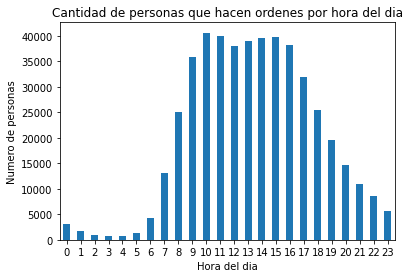

In [38]:
ordenes_hora_personas.plot(kind = 'bar',
                           title = 'Cantidad de personas que hacen ordenes por hora del dia',
                           xlabel = 'Hora del dia',
                           ylabel = 'Numero de personas',
                           rot = 360
)
plt.show()

Podemos ver en la Grafica de arriba que las horas pico del dia son de las 9 de la mañana a las 4 de la tarde, esto refleja que durante estas horas se hacen mas pedidos, por lo tanto es en estas horas donde hay mas trabajo, tambien podemos ver que el intervalo de horas con menos pedidos son de las 2 de la mañana a las 5 de la mañana. Pot ultimo podemos ver que a partir de las 15 horas tenemos una baja constante en la cantidad de pedidos que se realizan.


### [A3] ¿Qué día de la semana compran víveres las personas?

In [39]:
dow_personas = orders.groupby('order_dow')['user_id'].count()
print(dow_personas)

#compras_dias_de_la_semana = orders['order_dow'].value_counts().sort_index()
#print('pedidos realizados por dia de la semana',compras_dias_de_la_semana)

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64


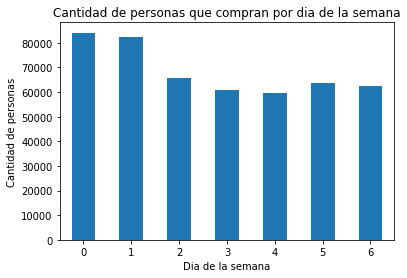

In [40]:
dow_personas.plot(kind = 'bar',
                 title = 'Cantidad de personas que compran por dia de la semana',
                 xlabel = 'Dia de la semana',
                 ylabel = 'Cantidad de personas',
                 rot = 360,
                 )
plt.show()

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [41]:
tiempo_otro_pedido = orders.groupby('order_dow')['days_since_prior_order'].agg('mean')
print(tiempo_otro_pedido)
print()
min_tiempo = orders['days_since_prior_order'].min()
print('Menor cantidad de dias transcurridos para realizar otra compra:',min_tiempo.astype('int'))
max_tiempo = orders['days_since_prior_order'].max()
print('Mayor cantidad de días transcurridos para realizar otra compra:',max_tiempo.astype('int'))

order_dow
0    11.794182
1    11.290893
2    11.181235
3    10.711267
4    10.536927
5    10.495518
6    11.383186
Name: days_since_prior_order, dtype: float64

Menor cantidad de dias transcurridos para realizar otra compra: 0
Mayor cantidad de días transcurridos para realizar otra compra: 30


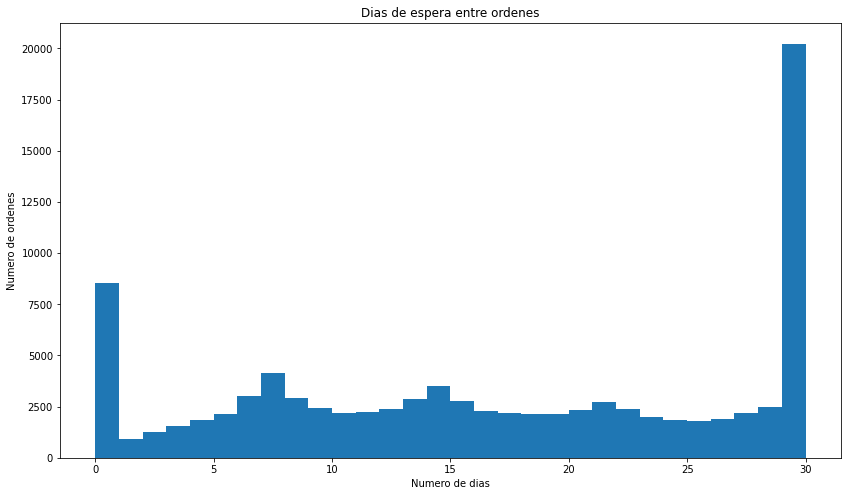

In [42]:
#Obtener el tiempo de espera entre ordenes por cliente
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
user_waiting_time = orders.groupby('user_id')['days_since_prior_order'].sum()

#Crear el Grafico
plt.figure(figsize = (14,8))
plt.hist(user_waiting_time, bins = 30, range = (0,30))
plt.xlabel('Numero de dias')
plt.ylabel('Numero de ordenes')
plt.title('Dias de espera entre ordenes')
plt.show()

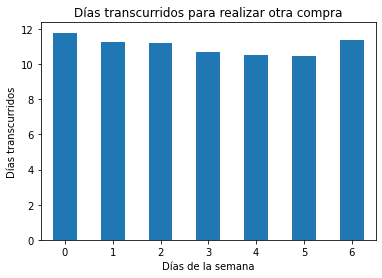

In [43]:
tiempo_otro_pedido.plot(kind = 'bar',
                       title = 'Días transcurridos para realizar otra compra',
                       xlabel = 'Días de la semana',
                       ylabel = 'Días transcurridos',
                       rot = 360,
                       )
plt.show()

Lo que hizimos en esta grafica para poder ver el tiempo que las personas esperan para hacer otro pedido fue usar la columna `'days_since_prior_order'` ya que era la unica columna que nos brindaba información del tiempo transcurrido para hacer otro pedido desde que hicieron un pedido.

Esta columna representa su tiempo en días. Algo muy interesante que podemos ver es que los valores minimo y maximos son muy diferentes pero por ser una gran cantidad de datos con valores entre el `0` y `30`, al sacar el promedio por dia podemos ver que tardan un promedio de 11 días para realizar otro pedido. 

Esto lo hicimos al sacar el promedio de tiempo en días que las personas esperaban para realizar otro pedido, sacamos el promedio de cuanto tiempo tardaban las personas en hacer otro pedido para cada dia de la semana iniciando con el dia domingo y asi sucesivamente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [44]:
hod_wed = orders[orders['order_dow']==3]['order_hour_of_day'].value_counts().sort_index()
hod_sat = orders[orders['order_dow']==6]['order_hour_of_day'].value_counts().sort_index()

In [45]:
hod_diff = pd.concat([hod_wed, hod_sat], axis = 1)
hod_diff.columns= ['hod_wed', 'hod_sat']
display(hod_diff)

,hod_wed,hod_sat
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


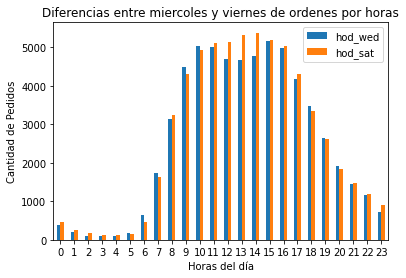

In [46]:
hod_diff.plot(kind = 'bar', title = 'Diferencias entre miercoles y viernes de ordenes por horas',
             xlabel = 'Horas del día',
             ylabel = 'Cantidad de Pedidos',
             rot = 360
             )
plt.show()

Podemos ver en la grafica que las distribuciones de `hod_wed` y `hod_sat` son muy parecidas, salvo que entre las horas 12 y 14 pareciera haber una mayor cantidad de flujos de pedidos para los sabados que son representan los valores de la columna`hod_sat` y en el grafico sus barras son color naranjas mientras que las barras azules representan los días miercoles para la columna `hod_wed`. Podemos notar como las barras naranjas del día sabado se elevan mas de lo normal a comparación de las azules del dia miercoles de las 12 del dia a las 2 de la tarde.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
num_ped_client = orders.groupby('order_number')['user_id'].count()
print(num_ped_client)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64


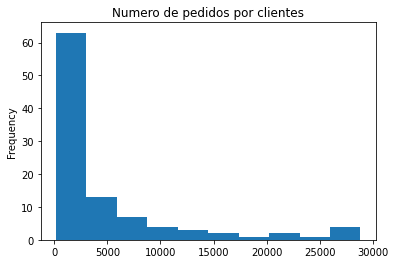

In [48]:
num_ped_client.plot(kind = 'hist', title = 'Numero de pedidos por clientes', xlabel = 'Numero de pedidos',
                    ylabel = 'Cantidad de clientes')
plt.show()

La distribución para el número de pedidos por clientes disminuye de una forma continua, a medida que aumenta la cantidad de pedidos disminuyen la cantidad de clientes. Esto es razonable por que la mayoria de las personas pueden hacer un pedido pero ya hacer mas pedidos requiere de mas recursos y podemos verlo en nuestra grafica.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
merge_products = order_products.merge(products, on = 'product_id')

In [50]:
popular_products = merge_products.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)
display(popular_products.head(20))

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


Los 20 productos mas populares son organicos y cosas saludables, parece que los clientes de este conjunto de datos se preocupan por su buena alimentación. Tambien al analizar de una forma mas profunda podemos ver que la mayoria de los productos son frutas y verduras.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
number_items = order_products.groupby('order_id')['product_id'].count()
hist_values = number_items.value_counts().sort_index()




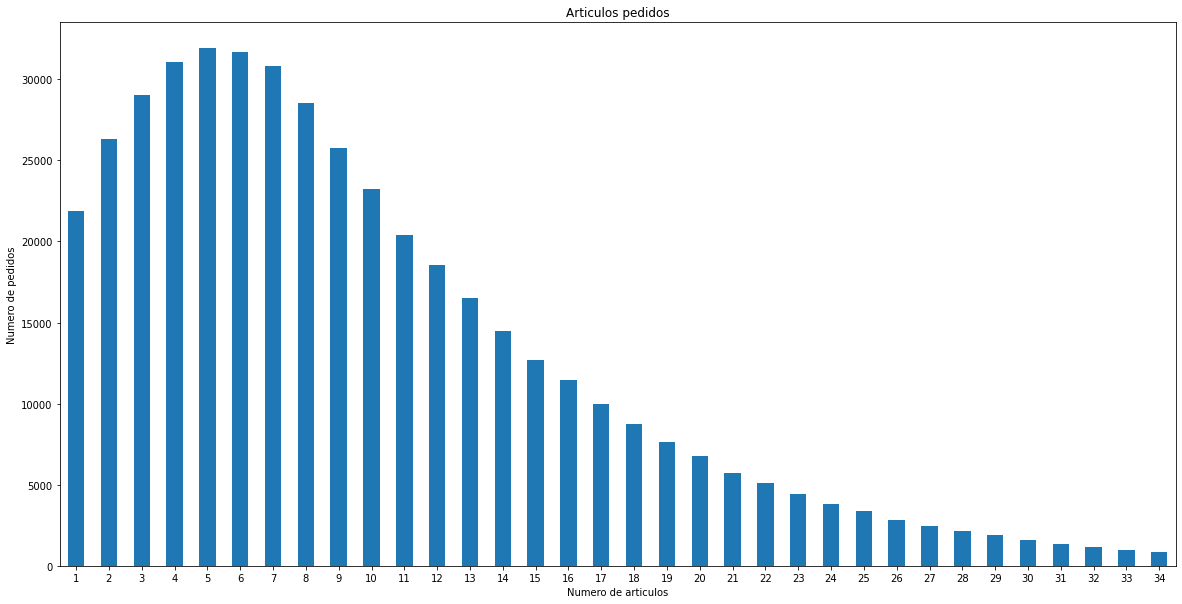

In [52]:
hist_values[hist_values.index < 35].plot(kind = 'bar', title = 'Articulos pedidos',
                                        xlabel = 'Numero de articulos',
                                        ylabel = 'Numero de pedidos',
                                        rot = 360,
                                        figsize = [20,10])
plt.show()

En la cantidad de articulos comprados de 1 articulo a 5 podemos ver un incremento, siendo el 5 su maximo y despues empiezan a decaer la cantidad de articulos que llevan por pedidos y tiene logica ya que comprar menos articulos es mas accesible para mas personas y es por eso que podemos ver como decaen la cantidad de pedidos a medida que sube la cantidad de articulos por que es menos la gente que tiene acceso o los recursos para comprar mas articulos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
products_reordered = order_products[order_products['reordered'] == 1]
merging_products = products_reordered.merge(products, on = 'product_id')
grouping = merging_products.groupby(['product_name','product_id']).count().sort_values(['order_id'], ascending = False)
display(grouping.head(20))

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_name,product_id,,,,,
BANANA,24852,55763,55763,55763,55763,55763
BAG OF ORGANIC BANANAS,13176,44450,44450,44450,44450,44450
ORGANIC STRAWBERRIES,21137,28639,28639,28639,28639,28639
ORGANIC BABY SPINACH,21903,26233,26233,26233,26233,26233
ORGANIC HASS AVOCADO,47209,23629,23629,23629,23629,23629
ORGANIC AVOCADO,47766,18743,18743,18743,18743,18743
ORGANIC WHOLE MILK,27845,16251,16251,16251,16251,16251
LARGE LEMON,47626,15044,15044,15044,15044,15044
ORGANIC RASPBERRIES,27966,14748,14748,14748,14748,14748


El resultado que obtenemos es muy similar al que obtuvimos en el `7.7` pero hay una pequeña variacion debido a que en este caso nos enfocamos mas en aquellos productos que vuelven a pedirse con mayor frecuencia y debido a eso excluye a algunos productos que aparecen en el `7.7` pero aqui no debido a que su frecuencia de reordenar a dichos productos es nula. Y esto lo sabemos al ver que en la columna `'reordered'` tenga un 0 de falso, es por eso que en la celda uno usamos `['reordered'] ==1` para excluir los valores falsos osea los productos que no se han vuelto a pedir. Aun asi  existe una correlación en estos resultados, no son totalmente identicas pero la mayoria de los resultados que muestran ambas tablas son muy similares, debido a que aquellos productos que se vuelven a reordenar se vuelven a comprar y es por ello que aumenta la cantidad de veces que el producto se ha comprado afectando directamente el resultado que obtuvimos en el `7.7`.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
#reorder_product_id = orders_id_merge.groupby('product_id')['reordered'].mean()
reorder_product_id  = order_products.groupby(['product_id', 'order_id'], as_index = False)['reordered'].mean().sort_values(['reordered'], ascending = False)
#reordered_product_id = reorder_product_id.sort_values(ascending = False).reset_index()
display(reorder_product_id)

,product_id,order_id,reordered
2272503,25272,937602,1
2053340,23430,1574981,1
2053318,23430,1022368,1
2053319,23430,1058633,1
2053320,23430,1066032,1
...,...,...,...
2123068,24358,1030312,0
2123069,24358,1345481,0
2123070,24358,3138131,0
2123071,24358,3337842,0


En esta tabla usamos el conjunto de datos `order_products`, no fue necesario usar la función `'merge'` ya que el conjunto de datos `order_products` contenia las columnas que necesitabamos. En la tabla que acabo de crear podemos ver en la columna `'reordered'` valores de 1 y 0, donde el 1 representa un 100 porciento de proporcion para cada producto que se pide y se vuelve a pedir. Usamos `.sort_values(['reordered'], ascending = False` para poder ver en la parte superior los valores con 1 en la columna `ordered` y en la parte inferior los valores 0.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [55]:
order_id_merge = order_products.merge(orders, on = 'order_id')

In [56]:
reorder_products = order_id_merge.groupby('user_id')['reordered'].mean()
reordered_products = reorder_products.sort_values(ascending = False).reset_index()
display(reordered_products)

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


En la primera celda usamos la función `merge` para poder juntar los conjuntos de datos `order_products` y `orders` lo logramos a travez de la columna `'order_id'` ya que era una columna que ambos tenian en comun. Al hacer esto los agrupamos por clientes y la cantidad de productos que ya habian pedido, atravez de las columnas `'user_id'` para clientes y de la columna `'reordered'` para la cantidad de veces que han vuelto a pedir el producto. Al tener esto solo hizo falta sacarles el promedio para poder obtener la proporcion. Y al hacer esto obtenemos una tabla donde el 1 representa un 100 porciento lo cual significa que estos clientes han reordenado el 100% de sus productos que habian comprado con anterioridad.AL final de la tabla podemos ver que tenemos clientes con un 0 que representa que estos clientes no han vuelto a comprar productos que habian comprado antes esto se puede deber a varios factores y quizas una pueda ser que sea su primera compra.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
merge_prod = order_products.merge(products)
first_cart_prod = merge_prod[merge_prod['add_to_cart_order']==1]

In [58]:
cart_order_group = first_cart_prod.groupby(['product_id', 'product_name']).count().sort_values(('add_to_cart_order'), ascending = False)

In [59]:
display(cart_order_group.head(20))

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,15562,15562,15562,15562,15562
13176,BAG OF ORGANIC BANANAS,11026,11026,11026,11026,11026
27845,ORGANIC WHOLE MILK,4363,4363,4363,4363,4363
21137,ORGANIC STRAWBERRIES,3946,3946,3946,3946,3946
47209,ORGANIC HASS AVOCADO,3390,3390,3390,3390,3390
21903,ORGANIC BABY SPINACH,3336,3336,3336,3336,3336
47766,ORGANIC AVOCADO,3044,3044,3044,3044,3044
19660,SPRING WATER,2336,2336,2336,2336,2336
16797,STRAWBERRIES,2308,2308,2308,2308,2308


Wow podemos ver que en todas las tablas que hemos hecho hasta el momento `BANANA`  y `BAG OD ORGANIC BANANAS` han sido siempre los valores mas altos. En esta tabla podemos visualizar los 20 principales artículos que las personas ponen primero en sus carritos.

Para poder ver unicamente aquellos productos que fueron los primeros en añadirse a los carritos usamos `['add_to_cart_order']==1` en la primera función para poder excluir a los demas articulos que se agregaron en cualquier otro orden que no fuera el primero.

### Conclusion general del proyecto:

En este proyecto aprendi a localizar la forma en la que algunos datos faltantes tenian patrones, existian correlaciones con otras columnas como en el caso del ejercicio `6.1`  donde los datos faltantes del conjunto de datos products tenian una relacion directa con el `'aisle_id'` 100 y con el	`'department_id'` 21.

Las graficas necesitan ser modificadas para poder transmitir lo que deseamos, como en el caso del ejercicio `7.8` donde tuvimos que reflejar solo una muestra de los datos  que reflejara la pendiente que queriamos compartir, al usar `[hist_values.index < 35]` ya que si hubieramos puesto todos los datos, nos daria una grafica que seria muy dificil de visualizar, agregando a todo esto, tambien fue de mucha utilidad `rot` para que nuestros valores en el eje x de varias graficas pudieran verse bien.

Y por ultimo, en este conjunto de datos con las graficas que hicimos podemos determinar que los clientes compran en su mayoria frutas y verduras ademas de que son organicas.